In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [5]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

In [6]:
df = pd.read_csv('../../data/data/H161.csv', parse_dates=['utc_time'])
# df.columns = ['utc_time','73_H160.PHASE','73_H160.STEP','73_H160.STATMENT','73_H160.NN(33)','GWI4801.PV','GTI8031.PV','GPI8030.PV']
df.columns = ['time','batch','phase', 'heat_time', 'weight', 'temp', 'pressure','vac_temp']

/tmp/ipykernel_4538/2244943722.py:1: DtypeWarning: Columns (1,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/data/H161.csv', parse_dates=['utc_time'])


In [7]:


df["time"] = df["time"].dt.tz_localize(None)
df['date'] = df['time'].dt.date

In [8]:
df.sample(2)

,time,batch,phase,heat_time,weight,temp,pressure,vac_temp,date
84656,2020-06-15 06:17:11,22324.0,DRYING,0.5,3857.0,33.3,761.7,34.71,2020-06-15
280984,2020-10-29 14:25:11,22829.0,FEEDING,0.0,91.2,29.9,742.1,33.11,2020-10-29


In [24]:
def load_query(path):
    with open(path) as file:
        return file.read()

In [25]:
query = load_query('daily_cycles.sql')
daily_cycles = pysqldf(query)

In [26]:
daily_cycles.sample(4)


,DATE,num_cycles
567,2021-12-01,6
417,2021-06-25,3
479,2021-08-27,7
684,2022-03-29,3


In [27]:
daily_cycles.describe()

,num_cycles
count,694.000000
mean,4.927954
std,3.962377
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,53.000000


In [28]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

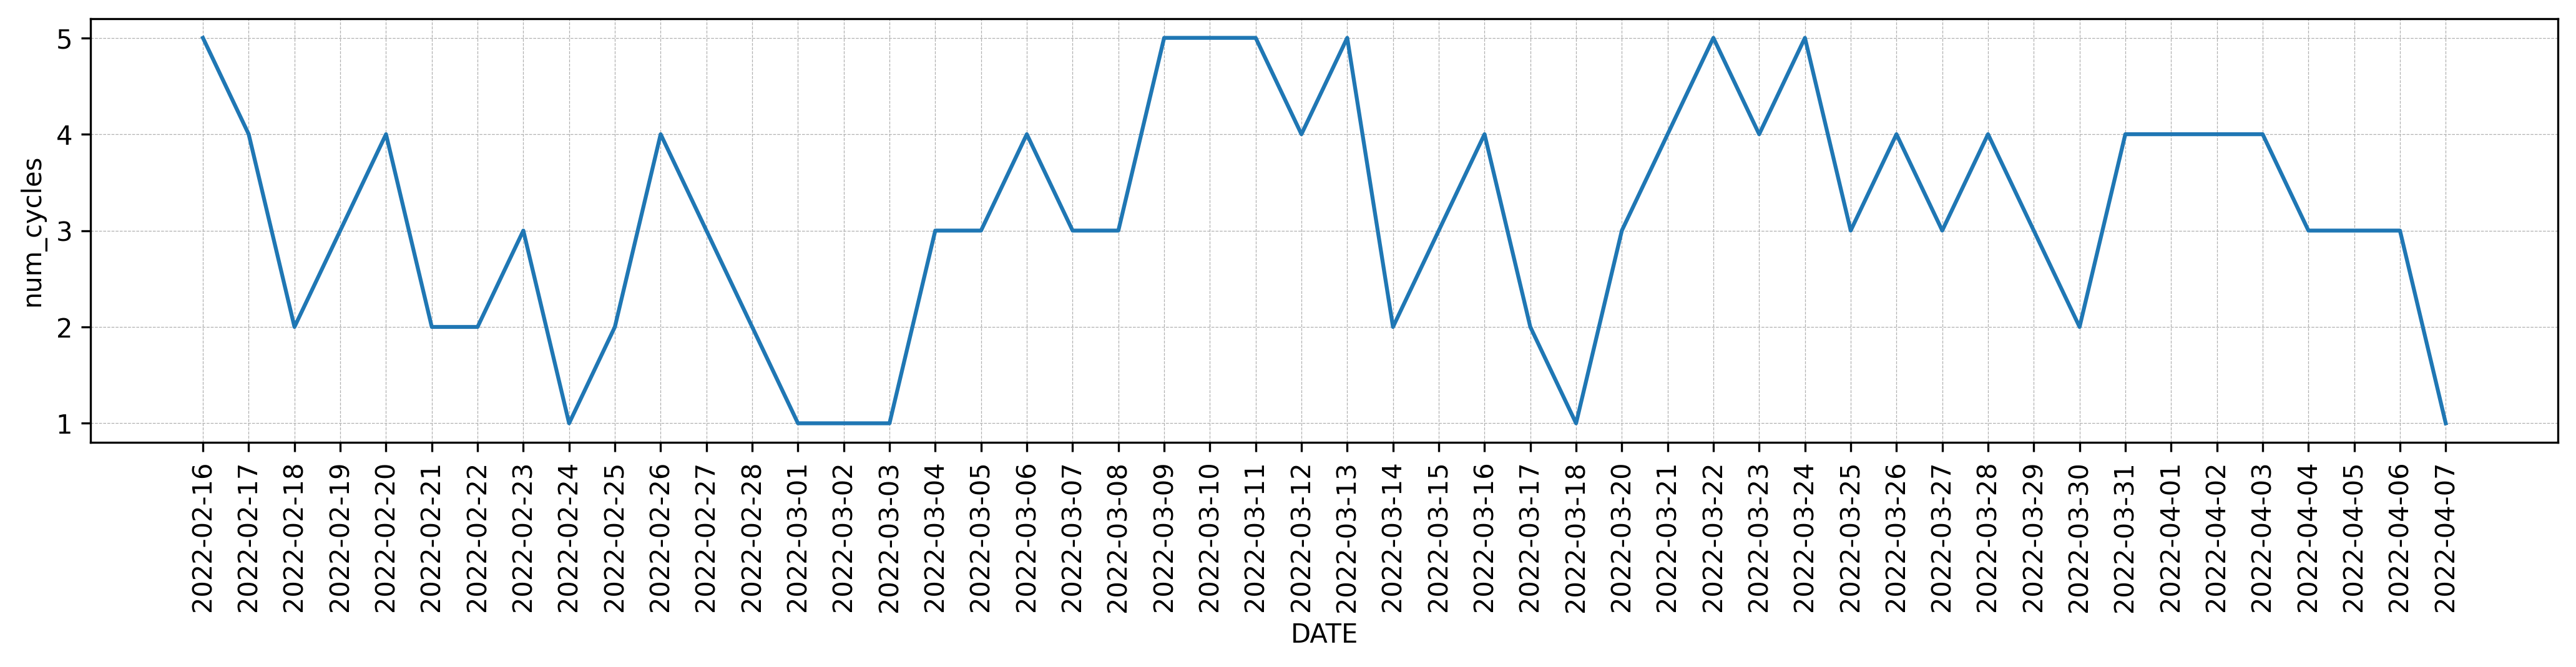

In [29]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=daily_cycles.tail(50), x='DATE', y='num_cycles')
plt.grid(linestyle='--', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [34]:
query = load_query('weekly_cycles.sql')
weekly_cycles = pysqldf(query)

In [37]:
weekly_cycles.tail()

,week,num_cycles
99,2022-03-06,43
100,2022-03-13,30
101,2022-03-20,45
102,2022-03-27,38
103,2022-04-03,20


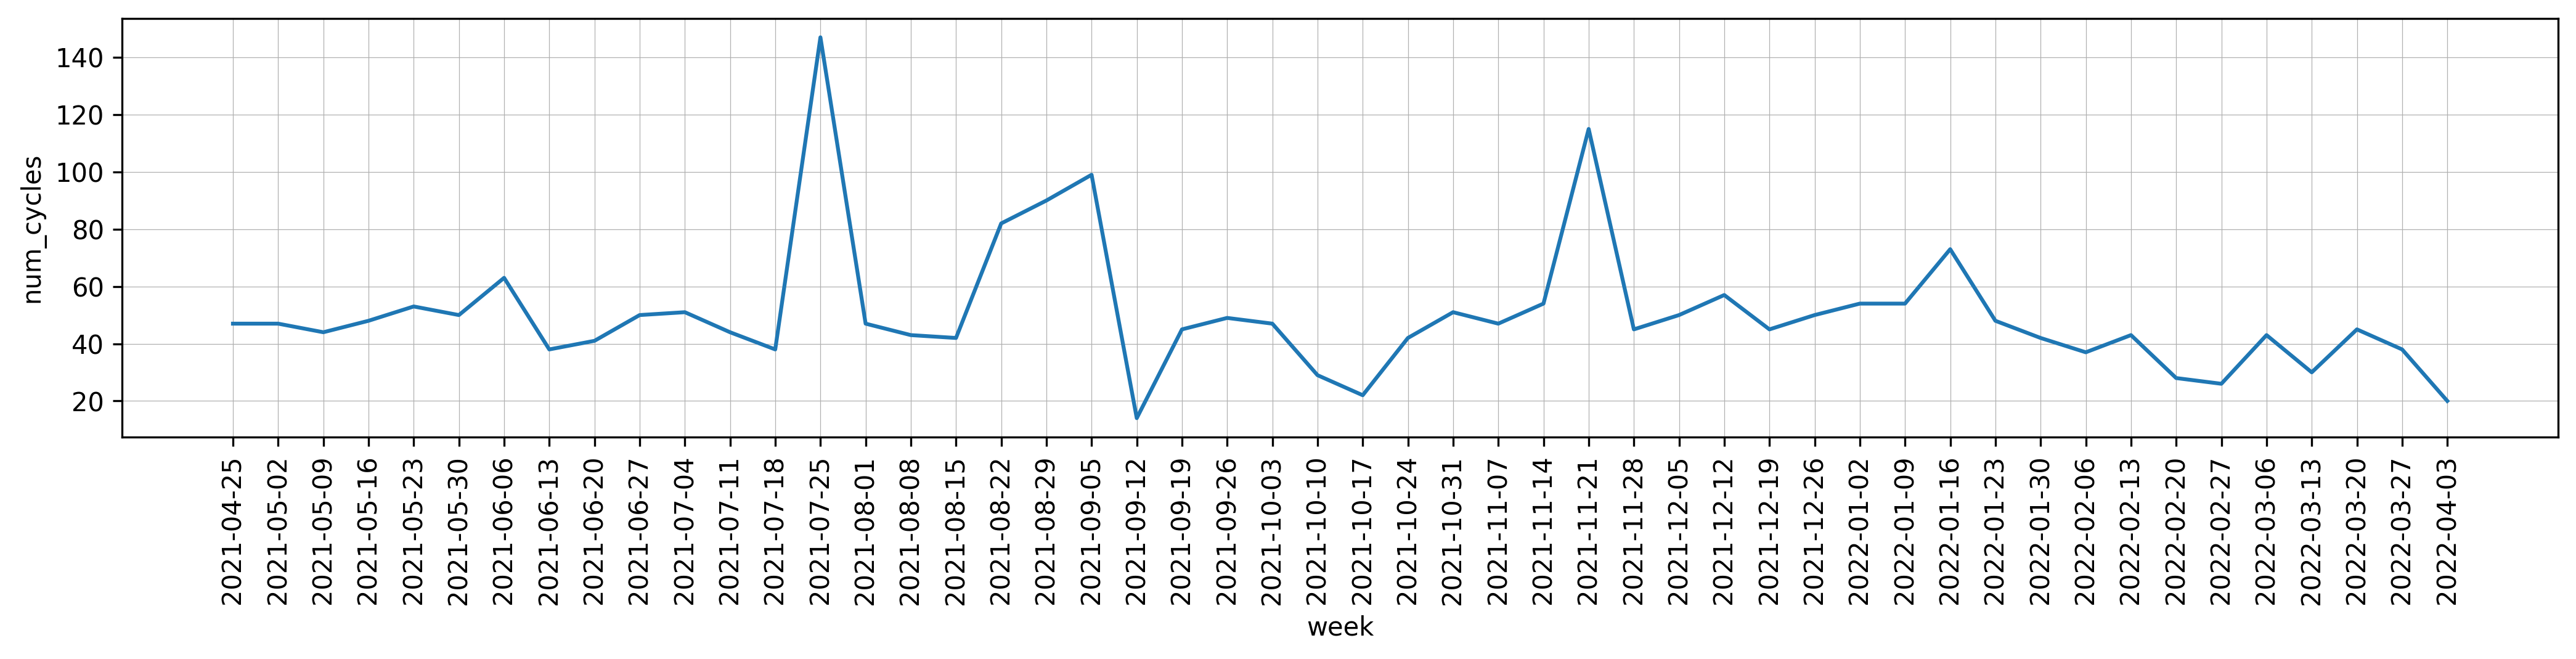

In [40]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi': 300})
fig, ax = plt.subplots()
sns.lineplot(data=weekly_cycles.tail(50), x='week', y='num_cycles')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)